1\. Write a function that converts number representation (bin<->dec<->hex)

In [2]:
def BintoDec(n):
    v = [int(x) for x in str(n)]
    v = v[::-1]
    d = 0
    for i in range(0,len(v)):
        d += pow(2,i)*v[i]
    return(d)

def DectoBin(n):
    v = []   
    while n>0:    
        v.append(n%2)    
        n = n//2 
    v = v[::-1]
    b = "".join(map(str,v))
    return(b)

def DectoHex(n):
    v = []
    while n > 0:    
        r = n%16    
        if   r == 10: r = 'a'
        elif r == 11: r = 'b'
        elif r == 12: r = 'c'
        elif r == 13: r = 'd'
        elif r == 14: r = 'e'
        elif r == 15: r = 'f'
        v.append(r)
        n = n//16
    v = v[::-1]
    h = "".join(map(str,v))
    return(h)

def HextoDec(n):
    v =[int(x) for x in str(n)]
    v = v[::-1]
    d = 0
    for i in range(0,len(v)):
        if   v[i] == 'a': v[i] = 10
        elif v[i] == 'b': v[i] == 11 
        elif v[i] == 'c': v[i] == 12
        elif v[i] == 'd': v[i] == 13
        elif v[i] == 'e': v[i] == 14
        elif v[i] == 'f': v[i] == 15
        d += pow(16,i)*v[i]
    return(d)

n = 10

print("Binary 10 as decimal:", BintoDec(n))
print("Decimal 10 as binary:", DectoBin(n))
print("Decimal 10 as hexadecimal:", DectoHex(n))
print("Hexadecimal 10 as decimal:", HextoDec(n))

Binary 10 as decimal: 2
Decimal 10 as binary: 1010
Decimal 10 as hexadecimal: a
Hexadecimal 10 as decimal: 16


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
w = "word" #need a 4 character string to have a 32 bit word

bw = '0'+'0'.join(format(ord(i), 'b') for i in w) #convert to 32 bit binary

def conv_float(a):
    fl = 0
    exp = 0
    
    #mantissa
    for i in range(9,32):
        fl += int(a[i])*pow(2,8-i)
    fl += 1  
    
    #exponent
    for i in range(1,9):
        exp += int(a[i])*pow(2,8-i)
    exp = exp-127
    
    fl = fl*(2**exp)
    
    #sign
    if int(a[0]) == 1:
        fl*=(-1)    
    
    return(fl)

print(bw)
print(conv_float(bw))

01110111011011110111001001100100
4.8565588543003575e+33


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [4]:
stu = 1
while True:
    underf = stu 
    stu /= 2
    if stu == 0:
        print("The underflow limit is {}".format(underf))
        break

sto = 1.0 #must be a float, no upper limit for integers
while True:
    overf = sto
    sto *= 2
    if sto == float('inf'):
        print("The overflow limit is {}".format(overf))
        break

The underflow limit is 5e-324
The overflow limit is 8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [5]:
start = 1
add = 1 

while True:
    add /= 2 
    if start + add == start:
        print("The machine precision is {}".format(add))
        break

The machine precision is 1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [6]:
#(a)
from math import sqrt

def quadr(a,b,c):
    delta = b**2 - 4*a*c
    if delta >= 0:
        x1 = ( -b+sqrt(delta) )/(2*a)
        x2 = ( -b-sqrt(delta) )/(2*a)
        return(x1, x2)
    else: return(print("No real solutions"))

x1, x2 = quadr(0.001, 1000, 0.001)
print("(a) The two solutions are x1 =", x1,"and x2 =", x2)

#(b)
def quadr(a,b,c):
    delta = b**2 - 4*a*c
    if delta >= 0:
        x1 = (2*c)/( -b - sqrt(delta) )
        x2 = (2*c)/( -b + sqrt(delta) )
        return(x1, x2)
    else: return(print("No real solutions"))

x1, x2 = quadr(0.001, 1000, 0.001)
print("(b) The two solutions are x1 =", x1,"and x2 =", x2)

(a) The two solutions are x1 = -9.999894245993346e-07 and x2 = -999999.999999
(b) The two solutions are x1 = -1.000000000001e-06 and x2 = -1000010.5755125057


The problem in in the difference $\Delta = b^2 - 4ac$. Since in this example $b^2 = 10^6$ and $ac = 10^{-6}$, there are 12 orders of magnitude of difference between the two values. This leads to cancellation: the $\sqrt(\Delta)$ is basically equal to $b$ and depending on the $\pm$ sign at numerator you either get a solution that is basically 0 (with the +) or that is very big (with the -). The re-normalization performed in point (b) shifts the problem at the denominator.

To solve this problem we can divide the numerator into its two addends, divide by a and only then sum the two, as shown in code (c).

In [7]:
#(c)
from math import sqrt

def quadr(a, b, c):
    delta = b**2 - 4*a*c
    if delta >= 0:
        l = -b/a
        r = sqrt(delta/a)
        x1 = (l + r)/2
        x2 = (l - r)/2
        return(x1, x2)
    else: return(print("No real solutions"))
        
x1, x2 = quadr(0.001, 1000, 0.001)
print("(c) The two solutions are x1 =", x1,"and x2 =", x2)

(c) The two solutions are x1 = -484188.6116991897 and x2 = -515811.3883008103


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [8]:
def func(x):
    f = x*(x-1)
    return(f)

#(a)
def deriv(func,x,d):
    Df = (func(x+d)-func(x))/d
    return(Df)

print("The discrete derivative with x = 1 and delta = 0.01 is f'(1) =", deriv(func, 1, 0.01))
print("The analytic value of the derivative with x = 1 is f'(1) = 1")

#(b)
import math
denom = []
numvals = []

for i in range(2,15,2):
    exp = 10**(-i)
    denom.append(exp)
    der = deriv(func, 1, exp)
    numvals.append(abs(der-1))
    print("The discrete derivative with x = 1 and delta = 10^(-{})".format(i), "is {}".format(der))
 

The discrete derivative with x = 1 and delta = 0.01 is f'(1) = 1.010000000000001
The analytic value of the derivative with x = 1 is f'(1) = 1
The discrete derivative with x = 1 and delta = 10^(-2) is 1.010000000000001
The discrete derivative with x = 1 and delta = 10^(-4) is 1.0000999999998899
The discrete derivative with x = 1 and delta = 10^(-6) is 1.0000009999177333
The discrete derivative with x = 1 and delta = 10^(-8) is 1.0000000039225287
The discrete derivative with x = 1 and delta = 10^(-10) is 1.000000082840371
The discrete derivative with x = 1 and delta = 10^(-12) is 1.0000889005833413
The discrete derivative with x = 1 and delta = 10^(-14) is 0.9992007221626509


The analytic result would be $f'(x) = 2x-1 \Longrightarrow f'(1)=1$. The difference in the numerical result is due to the use of an approximated formula which is true only in the limit $\delta \rightarrow 0$. If $\delta$ is too big the result won't be accurate. 

However, by increasingly reducing the value of $\delta$ we can see that the result improves only to an extent, then $\delta$ becomes so small that we start having problems due to the limitations in the machine's precision. We can visualize this in the following graph where we represent the evolution of the relative error as $\delta$ decreases:

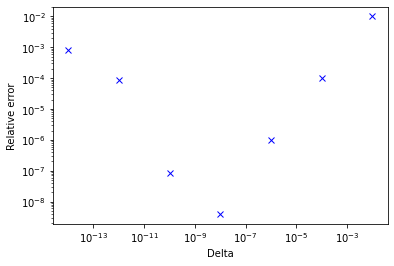

In [9]:
import matplotlib.pyplot as plt

plt.plot(denom, numvals, 'xb')
plt.xlabel('Delta')
plt.ylabel('Relative error')
plt.yscale("log")
plt.xscale("log")
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [2]:
#(a)
import math 

def g(x):
    return math.sqrt(1-x**2)

def riemannint(N):
    h = 2/N
    I = 0
    x = -1
    while x<1:
        I += h*g(x)
        x += h
    return(I)

trueres = math.pi/2

print("The analytic value of the integral is I = pi/2 which is approximately", trueres)
print("The Riemann sum (with N = 100) is", riemannint(100))
print("The relative error is", abs(trueres-riemannint(100))/trueres)

The analytic value of the integral is I = pi/2 which is approximately 1.5707963267948966
The Riemann sum (with N = 100) is 1.5691342555492493
The relative error is 0.0010581074180626305


In [5]:
#(b)
import time
t = 0
N1 = 5000 

while(t < 1.0):
    start = time.process_time()
    riemannint(N1)
    end = time.process_time()
    t = end-start
    N1 += 10000 #Step between iterations must be increased more than 1 to reduce run time (lose accuracy in determination of Nmax)

result1 = riemannint(N1-5000)
print("The max N to run the computation in t < 1s is N =", N1-5000, "+/- 10000" )
print("With this N the Riemann sum is", result1)
print("with a relative error of", abs(trueres-result1)/trueres)

t = 0
N60 = 150000

while(t < 60.0):
    start = time.process_time()
    riemannint(N60)
    end = time.process_time()
    t = end-start
    N60 += N60

result2 = riemannint(N60)
print("On the other hand with t = 1 min the Riemann sum is", result2)
print("with a relative error of", abs(trueres-result2)/trueres)

The max N to run the computation in t < 1s is N = 1500000 +/- 10000
With this N the Riemann sum is 1.570796325908686
with a relative error of 5.641792289007527e-10
On the other hand with t = 1 min the Riemann sum is 1.5707963291560654
with a relative error of 1.5031667541779913e-09
